# Higher Diploma in Science in Computing - Data Analytics

## Principles of Data Analytics - Project Palmer Penguins

**Author: Rodrigo De Martino Ucedo**
******

# Palmer Penguins

*****

![Penguins](lter_penguins.png)

### Imports
***

In [246]:
# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Graphic manipulation.

import seaborn as sns

# Numerical arrays.
import numpy as np

### Load Data

***

In [247]:
# Load the Penguins data set.
df = pd.read_csv("rawpalmerpenguinsdata.csv")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


### Inspect Data

***

In [248]:
# The first 5 rows of the data set.
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [249]:
# The last 5 rows of the data set.
df.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


In [250]:
# Informations of the data set.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [251]:
# Count the number of null.
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [252]:
# Inspect.
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [253]:
# Descibe the data set.
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [254]:
# Describe the object of the data set.
df.describe(include=[object])

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,MALE
freq,152,168,168


In [255]:
# Count the number of penguins of each specie.
df.value_counts(['species'])

species  
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [256]:
# Describe the data set for specie in Chinstrap specie.
df[df['species']=='Chinstrap'].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,68.0,48.833824,3.339256,40.9,46.35,49.55,51.075,58.0
bill_depth_mm,68.0,18.420588,1.135395,16.4,17.50,18.45,19.400,20.8
flipper_length_mm,68.0,195.823529,7.131894,178.0,191.00,196.00,201.000,212.0
body_mass_g,68.0,3733.088235,384.335081,2700.0,3487.50,3700.00,3950.000,4800.0


In [257]:
# Describe the data set for specie in Gentoo specie.
df[df['species']=='Gentoo'].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,123.0,47.504878,3.081857,40.9,45.3,47.3,49.55,59.6
bill_depth_mm,123.0,14.982114,0.981220,13.1,14.2,15.0,15.70,17.3
flipper_length_mm,123.0,217.186992,6.484976,203.0,212.0,216.0,221.00,231.0
body_mass_g,123.0,5076.016260,504.116237,3950.0,4700.0,5000.0,5500.00,6300.0


In [258]:
# Describe the data set for specie in Adelie specie.
df[df['species']=='Adelie'].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,151.0,38.791391,2.663405,32.1,36.75,38.8,40.75,46.0
bill_depth_mm,151.0,18.346358,1.216650,15.5,17.50,18.4,19.00,21.5
flipper_length_mm,151.0,189.953642,6.539457,172.0,186.00,190.0,195.00,210.0
body_mass_g,151.0,3700.662252,458.566126,2850.0,3350.00,3700.0,4000.00,4775.0


In [259]:
# Count the number of penguins of each island.
df.value_counts(['species', 'island'])

species    island   
Gentoo     Biscoe       124
Chinstrap  Dream         68
Adelie     Dream         56
           Torgersen     52
           Biscoe        44
Name: count, dtype: int64

In [260]:
# Correlation of the data set.
df.corr(method='pearson', numeric_only=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


In [261]:
# Correlation between Flipper Length and Body Mass.
df['flipper_length_mm'].corr(df['body_mass_g'])

0.8712017673060112

In [262]:
# Correlation of the data set.
df.groupby('island').corr(method='pearson', numeric_only=True)

bill_length_mm  bill_depth_mm  flipper_length_mm  \
island                                                                          
Biscoe    bill_length_mm           1.000000      -0.443601           0.865900   
          bill_depth_mm           -0.443601       1.000000          -0.579089   
          flipper_length_mm        0.865900      -0.579089           1.000000   
          body_mass_g              0.867797      -0.382032           0.876943   
Dream     bill_length_mm           1.000000       0.358702           0.532420   
          bill_depth_mm            0.358702       1.000000           0.427688   
          flipper_length_mm        0.532420       0.427688           1.000000   
          body_mass_g              0.310656       0.563623           0.525064   
Torgersen bill_length_mm           1.000000       0.248965           0.385468   
          bill_depth_mm            0.248965       1.000000           0.399882   
          flipper_length_mm        0.385468       0.399882           1.000000   
          body_mass_g              0.447031       0.571804           0.435911   

                             body_mass_g  
island                                    
Biscoe    bill_length_mm        0.867797  
          bill_depth_mm        -0.382032  
          flipper_length_mm     0.876943  
          body_mass_g           1.000000  
Dream     bill_length_mm        0.310656  
          bill_depth_mm         0.563623  
          flipper_length_mm     0.525064  
          body_mass_g           1.000000  
Torgersen bill_length_mm        0.447031  
          bill_depth_mm         0.571804  
          flipper_length_mm     0.435911  
          body_mass_g           1.000000

### Data Visualisation
***

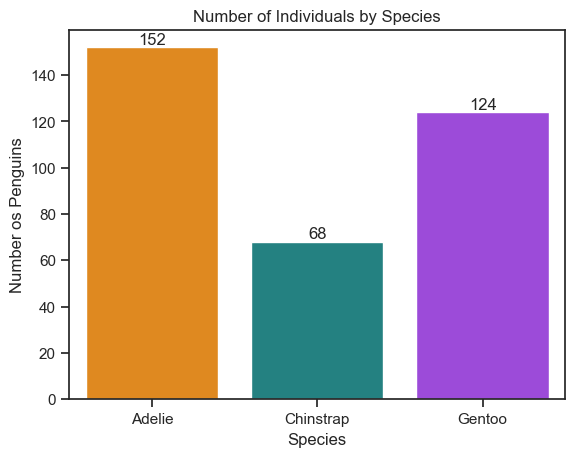

In [263]:
# Count the number of penguins for each specie.
ax = sns.countplot(x='species', data=df, palette=['#FF8C00','#159090','#A034F0'])
# Add title.
plt.title('Number of Individuals by Species')
# Add labels (X and Y).
plt.xlabel('Species')
plt.ylabel('Number os Penguins')
# Add total count on top of bar.
for container in ax.containers:
    ax.bar_label(container)

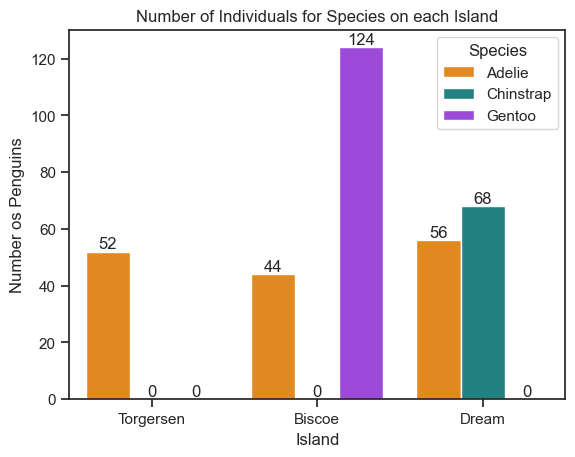

In [264]:
# Count the number of penguins for specie on each island.
ax = sns.countplot(x='island', hue='species', data=df, palette=['#FF8C00','#159090','#A034F0'])
# Add title.
plt.title('Number of Individuals for Species on each Island')
# Add legend tittle.
plt.legend(title='Species')
# Add labels (X and Y).
plt.xlabel('Island')
plt.ylabel('Number os Penguins')
# Add total count on top of bar.
for container in ax.containers:
    ax.bar_label(container)

Text(0, 0.5, 'Body Mass (g)')

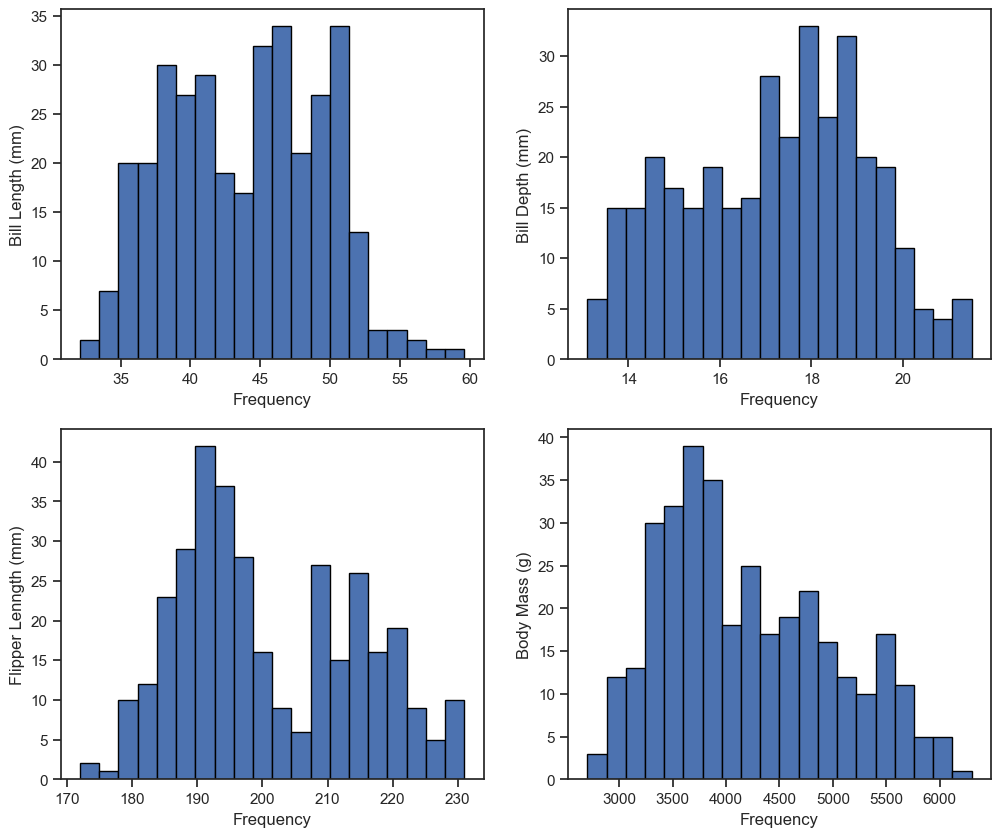

In [265]:
# Histogram of Palmer Penguins.
blength = df['bill_length_mm']
bdepth = df['bill_depth_mm']
flength = df['flipper_length_mm']
bmass = df['body_mass_g']
plt.figure(figsize = (12,10))
# Subplot position.
plt.subplot(2,2,1)
plt.hist(blength, bins=20, edgecolor = 'black')
# Add labels (X and Y).
plt.xlabel('Frequency')
plt.ylabel('Bill Length (mm)')
# Subplot position.
plt.subplot(2,2,2)
plt.hist(bdepth, bins=20, edgecolor = 'black')
# Add labels (X and Y).
plt.xlabel('Frequency')
plt.ylabel('Bill Depth (mm)')
# Subplot position.
plt.subplot(2,2,3)
plt.hist(flength, bins=20, edgecolor = 'black')
# Add labels (X and Y).
plt.xlabel('Frequency')
plt.ylabel('Flipper Lenngth (mm)')
# Subplot position.
plt.subplot(2,2,4)
plt.hist(bmass, bins=20, edgecolor = 'black')
# Add labels (X and Y).
plt.xlabel('Frequency')
plt.ylabel('Body Mass (g)')

*****
#### End
last commit on 31/04/2024